<a href="https://colab.research.google.com/github/datasciencechampion/zero-to-hero-datascience/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numerical Data Pre-processing**

This module is part of [Zero-to-Hero in data Science](https://colab.research.google.com/drive/1EGLE0Lnst0CNmkw5BOFGSqIT5oxl5xYW?usp=sharing)

Author : [Pramod Singh](https://www.linkedin.com/in/pramod-singh-4635962/)

# Topic Covered
- What is data pre-processing
- Data Exploration
- Encoding Categorical data (categorical to numerical transformation)
- Data normalization
- Spliting the data - train, test split

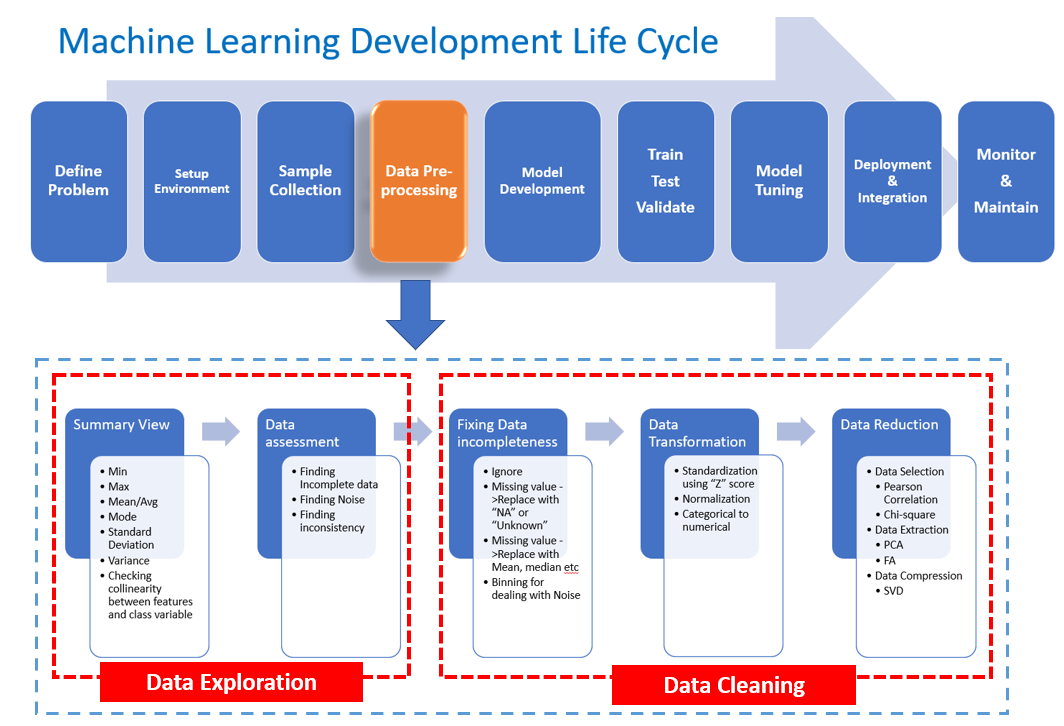

## **There are 4 main important steps for the preprocessing of data.**

- # Splitting of the data set in Training and Validation sets

- # Taking care of Missing values

- # Taking care of Categorical Features

- # Normalization of data set


In [ ]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [ ]:
#To upload from your local drive, start with the following code:
from google.colab import files
uploaded = files.upload()

Saving sample1.csv to sample1.csv


In [ ]:
#to import it into a dataframe (make sure the filename matches the name of the uploaded file)
import io
df = pd.read_csv(io.BytesIO(uploaded['sample1.csv']))

In [ ]:
df

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


#Handling the missing values
In the above data set we can see we have missing values in Age and Incom feature

Now there are multiple ways to handle missing values, one of them is to **ignore** them and **delete** the entire entry/row, this is commonly done in datasets containing a **very large** number of entries, where the missing values only constitute 0.1% of the total data. Thus they affect the model negligibly and can be removed.

But in our case, the dataset is **very small** and we cannot just ignore those rows. So we use another method, in which we take the **mean** of the entire column containing the missing values(in our case the age or salary column) and **replace the missing values with that mean**.

To perform this process we will use **SimpleImputer class** from the **ScikitLearn library**

In [ ]:
from sklearn.impute import SimpleImputer

# 'np.nan' signifies that we are targeting missing values
# and the strategy we are choosing is replacing it with 'mean'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(df.iloc[:, 1:3])
df.iloc[:, 1:3] = imputer.transform(df.iloc[:, 1:3])

# print the dataset
df

,Region,Age,Income,Online Shopper
0,India,49.000000,86400.000000,No
1,Brazil,32.000000,57600.000000,Yes
2,USA,35.000000,64800.000000,No
3,Brazil,43.000000,73200.000000,No
4,USA,45.000000,76533.333333,Yes
5,India,40.000000,69600.000000,Yes
6,Brazil,43.777778,62400.000000,No
7,India,53.000000,94800.000000,Yes
8,USA,55.000000,99600.000000,No
9,India,42.000000,80400.000000,Yes


Here the “missing_values = np.nan” means that we are replacing missing values and “strategy = ‘mean’ ” means that we are replacing the missing value with the mean of that column.

# Encoding categorical data
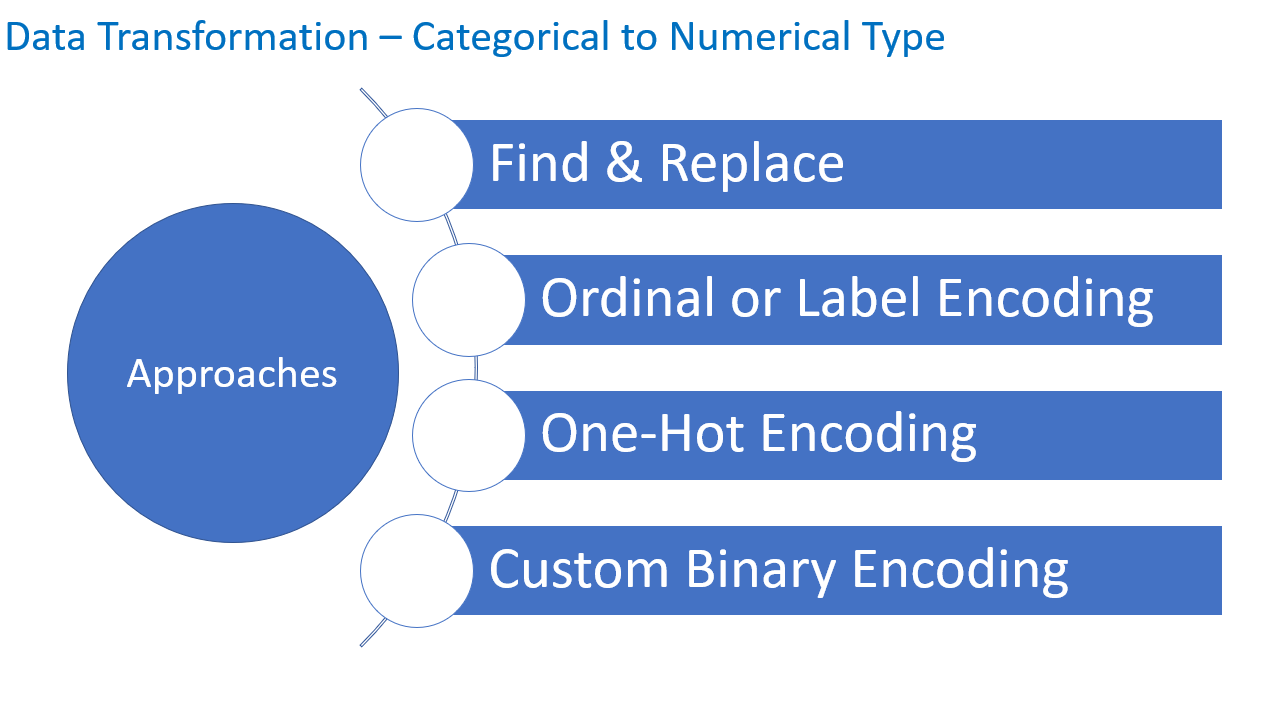
In our case, we have two categorical columns, the country column, and the purchased column.

In the country column, we have three different categories:
India,
Brazil,
USA.

We can simply label Brazil as 0, India as 1, and USA as 2 but doing this might lead our machine learning model to interpret that there is some correlation between these numbers and the outcome.

So to avoid this.

We apply OneHot Encoding

## OneHot Encoding

OneHot Encoding consists of turning the country column into three separate columns, each column consists of 0s and 1s. Therefore each country will have a unique vector/code and no correlation between the vectors and outcome can be formed.

To perform this encoding we use OneHotEncoder and ColumnTransformer class from the same ScikitLearn library.

The ColumnTransformer class allows us to select the column to apply encoding on and leave the other columns untouched.

Note: The new columns created will be added in the front of the data frame and the original column will be deleted.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# [0] signifies the index of the column we are appliying the encoding on
df = pd.DataFrame(ct.fit_transform(df))
df

,0,1,2,3,4,5
0,0,1,0,49,86400,No
1,1,0,0,32,57600,Yes
2,0,0,1,35,64800,No
3,1,0,0,43,73200,No
4,0,0,1,45,76533.3,Yes
5,0,1,0,40,69600,Yes
6,1,0,0,43.7778,62400,No
7,0,1,0,53,94800,Yes
8,0,0,1,55,99600,No
9,0,1,0,42,80400,Yes


Now we can see that each country has got a unique vector or code, for example,

Brazil is 1 0 0,

India is  0 1 0, and

USA is     0 0 1.

##Label Encoding
In the last column, i.e. the purchased column, the data is in binary form meaning that there are only two outcomes either Yes or No. Therefore here we need to perform Label Encoding.

In this case, we use LabelEncoder class from the same ScikitLearn library.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])
# 'data.iloc[:,-1]' is used to select the column that we need to be encoded
df

,0,1,2,3,4,5
0,0,1,0,49,86400,0
1,1,0,0,32,57600,1
2,0,0,1,35,64800,0
3,1,0,0,43,73200,0
4,0,0,1,45,76533.3,1
5,0,1,0,40,69600,1
6,1,0,0,43.7778,62400,0
7,0,1,0,53,94800,1
8,0,0,1,55,99600,0
9,0,1,0,42,80400,1


We use ‘data.iloc[:,-1]’ to select the index of the column we are transforming.

As you can see the purchased column has been successfully transformed.
Now we have completed the encoding of all the categorical data in our dataset and can move to the next step.

# Normalizing the dataset

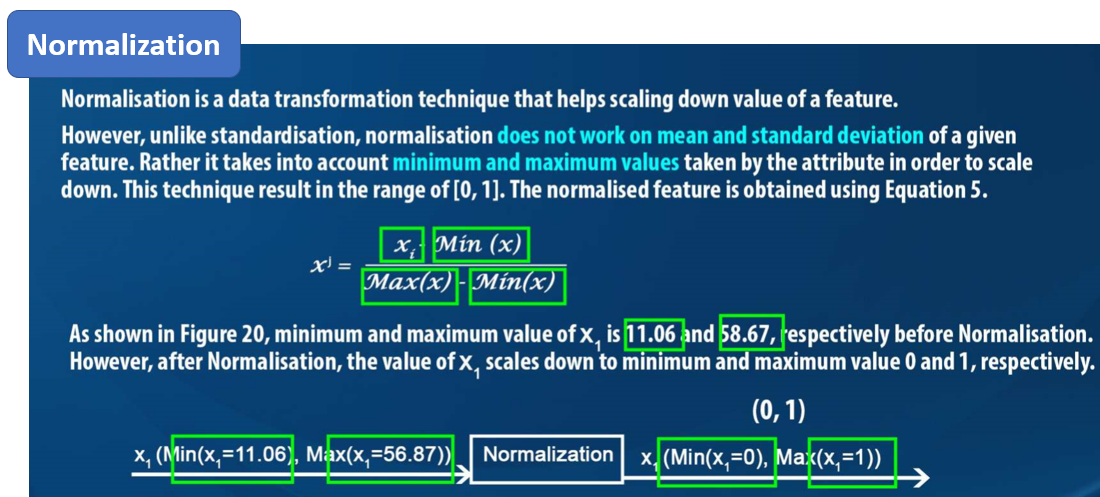

Feature scaling is bringing all of the features on the dataset to the same scale, this is necessary while training a machine learning model because in some cases the dominant features become so dominant that the other ordinary features are not even considered by the model.

When we normalize the dataset it brings the value of all the features between 0 and 1 so that all the columns are in the same range, and thus there is no dominant feature.


# Normalize data before or after split of training and testing data?
I want to separate my data into train and test set, should I apply normalization over data before or after the split? Does it make any difference while building predictive model?

Answer : You first need to split the data into training and test set (validation set could be useful too).

Don't forget that testing data points represent real-world data. Feature normalization (or data standardization) of the explanatory (or predictor) variables is a technique used to center and normalise the data by subtracting the mean and dividing by the variance. If you take the mean and variance of the whole dataset you'll be introducing future information into the training explanatory variables (i.e. the mean and variance).

Therefore, you should perform feature normalisation over the training data. Then perform normalisation on testing instances as well, but this time using the mean and variance of training explanatory variables. In this way, we can test and evaluate whether our model can generalize well to new, unseen data points.

### Normalization Example code :

Now to normalize the dataset we use MinMaxScaler class from the same ScikitLearn library.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df))
df

,0,1,2,3,4,5
0,0.0,1.0,0.0,0.739130,0.685714,0.0
1,1.0,0.0,0.0,0.000000,0.000000,1.0
2,0.0,0.0,1.0,0.130435,0.171429,0.0
3,1.0,0.0,0.0,0.478261,0.371429,0.0
4,0.0,0.0,1.0,0.565217,0.450794,1.0
5,0.0,1.0,0.0,0.347826,0.285714,1.0
6,1.0,0.0,0.0,0.512077,0.114286,0.0
7,0.0,1.0,0.0,0.913043,0.885714,1.0
8,0.0,0.0,1.0,1.000000,1.000000,0.0
9,0.0,1.0,0.0,0.434783,0.542857,1.0


As you can see in the above image all the values in the dataset are now between 0 and 1, so there are no dominant features, and all features will be considered equally.

Note: Feature scaling is not always necessary and only required in some machine learning models.

# Splitting the dataset

Before we begin training our model there is one final step to go, which is **splitting of the testing and training dataset.**
Remember 80-20 split. In machine learning, a larger part of the dataset is used to train the model, and a small part is used to test the trained model for finding out the accuracy and the efficiency of the model.

Now before we begin splitting the dataset we need to separate the dependent and independent variables which we have already discussed above in the article.

The last (purchased) column is the dependent variable and the rest are independent variables, so we’ll store the dependent variable in ‘y’ and the independent variables in ‘X’.

Another important part we need to remember is that while training the model accepts **data as arrays** so it is necessary that we **convert the data to arrays**. We do that while separating the dependent and independent variables by adding **.values** while storing data in ‘X’ and ‘y’.

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# .values function coverts the data into arrays
print("Independent Variable\n")
print(X)
print("\nDependent Variable\n")
print(y)

Independent Variable

[[0.         1.         0.         0.73913043 0.68571429]
 [1.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.13043478 0.17142857]
 [1.         0.         0.         0.47826087 0.37142857]
 [0.         0.         1.         0.56521739 0.45079365]
 [0.         1.         0.         0.34782609 0.28571429]
 [1.         0.         0.         0.51207729 0.11428571]
 [0.         1.         0.         0.91304348 0.88571429]
 [0.         0.         1.         1.         1.        ]
 [0.         1.         0.         0.43478261 0.54285714]]

Dependent Variable

[0. 1. 0. 0. 1. 1. 0. 1. 0. 1.]


Now let’s **split** the dataset between **Testing data** and **Training data**.
To do this we’ll be using the **train_test_split** class from the same ScikitLearn library.

Deciding the ratio between testing data and training data is up to us and depends on what we are trying to achieve with our model.

In our case, we are going to go with an 80-20% split between the train-test data. So 80% training and 20% testing data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#'test_size=0.2' means 20% test data and 80% train data

After this, the X_train and X_test variables will have their respective data.

In [ ]:
print(X_train)

[[0.         0.         1.         0.13043478 0.17142857]
 [0.         1.         0.         0.73913043 0.68571429]
 [1.         0.         0.         0.47826087 0.37142857]
 [0.         0.         1.         0.56521739 0.45079365]
 [0.         1.         0.         0.43478261 0.54285714]
 [1.         0.         0.         0.51207729 0.11428571]
 [0.         1.         0.         0.91304348 0.88571429]
 [0.         0.         1.         1.         1.        ]]


In [ ]:
print(X_test)

[[0.         1.         0.         0.34782609 0.28571429]
 [1.         0.         0.         0.         0.        ]]


##Now our data is finally ready for training!!

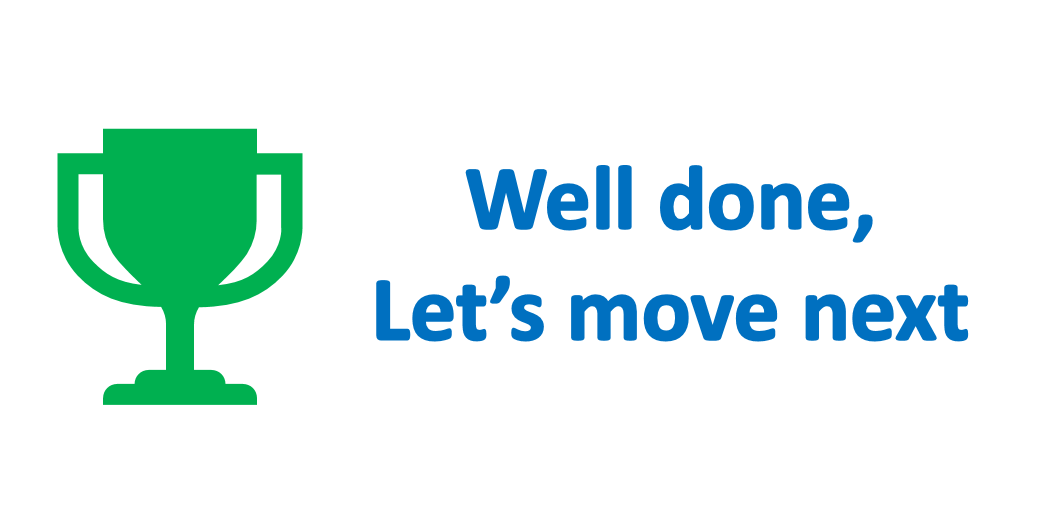